# Nice to Meat You : An Analysis on Meat Consumption

## Introduction

Meat consumption is a highly controversial topic in nowadays society in terms of [environment](https://www.theguardian.com/environment/2018/oct/10/huge-reduction-in-meat-eating-essential-to-avoid-climate-breakdown), [health](https://gamechangersmovie.com/), and [ethical](http://traslosmuros.com/en/slaughterhouse-documentary/) reasons. This situation introduces different ways of consuming meat and divides people according to their behaviors such as vegan, vegetarian, occasional meat consumer, and people consuming large amounts of meats.

In this project, we are particularly interested in the factors related to consuming meat and how the behavior of households varies according to their meat consumption. We are going to focus on demographic information such as economic status, family composition, age, and their relation with consuming meat. Moreover, we are going to study external effects that are related to meat consumption such as seasonal changes, campaigns, and discounts. Finally, we are going to categorize households according to their meat consumption and perform a behavior analysis per category.

To do so, we are going to use the Dunnhumby dataset. This dataset contains shopping information collected over two years from a group of 2,500 households as well as their information for each household. Moreover, we are planning to expand our analysis with an additional dataset about nutritional information.


## Factors that influence meat consumption

### Loading the data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [2]:
products = pd.read_csv('dunnhumby/product.csv', sep = ',')
meat_dept = ['MEAT-PCKGD','MEAT','PORK']
meat_products = products[products['DEPARTMENT'].isin(meat_dept)].copy()

In [3]:
meat_commodity = ['DELI MEATS','CHICKEN/POULTRY']
meat_products = meat_products.append(products[products['COMMODITY_DESC'].isin(meat_commodity)]).drop_duplicates()
meat_products['SUB_COMMODITY_DESC'].unique()
len(meat_products)

5648

## Scrape some websites to create a list of meat-related words

In [4]:
meat_words = []

### Website 1 : https://www.listchallenges.com/types-of-meat

In [5]:
urls = ["https://www.listchallenges.com/types-of-meat", "https://www.listchallenges.com/types-of-meat/list/2"]
for url in urls:
    r = get(url)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    meat_divs = soup.findAll("div", {"class": "item-name"})
    meat_words.extend([div.text.upper().strip() for div in meat_divs])

### Website 2 : https://www.manythings.org/vocabulary/lists/c/words.php

In [6]:
base_url = "https://www.manythings.org/vocabulary/lists/c/words.php"
urls = [base_url + "?f=meat", base_url + "?f=fish"]
for url in urls:
    r = get(url)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    meat_li = soup.findAll("li")
    meat_words.extend([li.text.upper().strip() for li in meat_li])

In [7]:
meat_words.extend(["SALAMI", "HAM", "POULTRY", "SEAFOOD", "FISH"])
print(meat_words)

['ANCHOVY', 'BACON', 'BEEF', 'BUFFALO', 'CARIBOU', 'CATFISH', 'CHICKEN', 'CLAMS', 'COD', 'CORNISH GAME HEN', 'CRAB', 'DUCK', 'EEL', 'EMU', 'GOAT', 'GOOSE', 'GROUSE', 'HALIBUT', 'HAM', 'KANGAROO', 'LAMB', 'LOBSTER', 'MACKEREL', 'MAHI MAHI', 'OCTOPUS', 'OSTRICH', 'OYSTERS', 'PHEASANT', 'PORK', 'QUAIL', 'RABBIT', 'SALMON', 'SARDINES', 'SCALLOPS', 'SHARK', 'SHRIMP', 'SNAKE', 'SQUAB', 'SQUID', 'SWORDFISH', 'TILAPIA', 'TUNA', 'TURKEY', 'VEAL', 'VENISON', 'SALAMI', 'HAM', 'POULTRY', 'SEAFOOD', 'FISH']


In [8]:
meat_words_regex = [r'\b%s\b' % word for word in meat_words]
full_regex = re.compile('|'.join(meat_words_regex))

meat_products2 = products[products.COMMODITY_DESC.str.contains(full_regex, regex=True) |\
                          products.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True)]
meat_products = meat_products.append(meat_products2).drop_duplicates()
len(meat_products)

6969

### In which departments is the meat ?

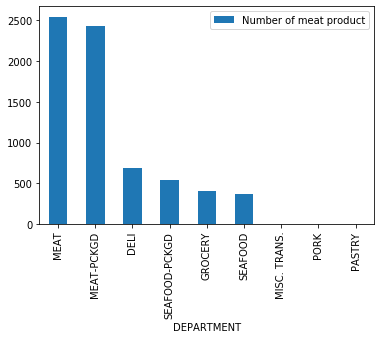

In [9]:
num_of_meat_per_dep = meat_products.groupby("DEPARTMENT")\
                                   .count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False)\
                                   .reset_index(name="Number of meat product")
num_of_meat_per_dep.plot.bar(x="DEPARTMENT", y="Number of meat product")

## Get only vegetables

In [10]:
veggies = [
    "asparagus",
    "beans",
    "beet",
    "broccoli",
    "Brussels sprouts",
    "cabbage",
    "carrot",
    "carrots",
    "cauliflower",
    "celery",
    "Chinese cabbage",
    "corn",
    "cucumber",
    "cucumbers",
    "eggplant",
    "eggplants",
    "green pepper",
    "Japanese radish",
    "kale",
    "lettuce",
    "okra",
    "onion",
    "onions",
    "peas",
    "pumpkins",
    "radish",
    "spinach",
    "sweet potato",
    "tomatoes",
    "tomato",
    "turnips",
]
veggies = [v.upper() for v in veggies]

In [11]:
veggie_words_regex = [r'\b%s\b' % word for word in veggies]
full_regex = re.compile('|'.join(veggie_words_regex))

veggie_products = products[products.COMMODITY_DESC.str.contains(full_regex, regex=True) |\
                          products.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True)]
len(veggie_products)

1972

In [93]:
veggie_products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
30,27633,69,GROCERY,Private,HISPANIC,MEXICAN BEANS REFRIED,16 OZ
49,27923,69,GROCERY,Private,HISPANIC,MEXICAN BEANS REFRIED,16 OZ
107,29512,69,GROCERY,Private,CANNED JUICES,TOMATO JUICE (OVER 50% JCE),46 OZ
109,29582,69,GROCERY,Private,VEGETABLES - SHELF STABLE,SPINACH & GREENS,7.75 OZ
117,29874,69,GROCERY,Private,BEANS - CANNED GLASS & MW,VARIETY BEANS - KIDNEY PINTO,15.25 OZ


## Get only food related products

In [13]:
food_dep = ['GROCERY', 'PASTRY', 'MEAT-PCKGD','SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI',
       'MEAT', 'SEAFOOD', 'SALAD BAR', 'GRO BAKERY','FROZEN GROCERY', 'SPIRITS', 'RESTAURANT',
       'DAIRY DELI', 'CHEF SHOPPE', 'DELI/SNACK BAR', 'PORK']

In [14]:
food_products = products[products.DEPARTMENT.isin(food_dep)].copy()

In [15]:
food_products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
5,26426,69,GROCERY,Private,SPICES & EXTRACTS,SPICES & SEASONINGS,2.5 OZ


### How is the food distributed accross departments ?

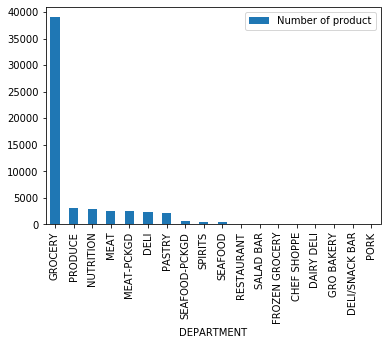

In [16]:
food_by_dep = food_products.groupby("DEPARTMENT")\
                           .count()["PRODUCT_ID"]\
                           .sort_values(ascending=False)\
                           .reset_index(name="Number of product")
food_by_dep.plot.bar(x="DEPARTMENT", y="Number of product")

## Descriptive analysis Transaction table

In [17]:
transactions = pd.read_csv('dunnhumby/transaction_data.csv', sep = ',')

### First look at the table

In [18]:
transactions.head(10)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0.0,0.0
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0.0,0.0
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0.0,0.0
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0


In [19]:
transactions.columns

Index(['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC'],
      dtype='object')

### Does the dataset contains NaN values ?

In [20]:
transactions.isna().any()

household_key        False
BASKET_ID            False
DAY                  False
PRODUCT_ID           False
QUANTITY             False
SALES_VALUE          False
STORE_ID             False
RETAIL_DISC          False
TRANS_TIME           False
WEEK_NO              False
COUPON_DISC          False
COUPON_MATCH_DISC    False
dtype: bool

We do not have any NaN values.

### Only keep the transactions related to food prodcuts

In [21]:
food_products_IDs = food_products.PRODUCT_ID.values
transactions = transactions[transactions.PRODUCT_ID.isin(food_products_IDs)]

### Create the PAID PRICE column

The colum named SALES_VALUE does not represent what a client paid for a product. It represents the raw value of a product that does not take into account the potential discounts. 

To be able to analyse the expenses of the customers we want to create a column PAID_PRICE that contains the actual amount that the customer paid. 

The paid price is calculated as follows :

PAID_PRICE = (SALES_VALUE - ( |RETAIL_DISC| + |COUPON_MATCH_DISC|)) 

In [22]:
transactions["PAID_PRICE"] = (transactions.SALES_VALUE - (transactions.RETAIL_DISC.abs() + transactions.COUPON_MATCH_DISC.abs()))
transactions["PAID_PRICE"] = transactions["PAID_PRICE"].clip(lower=0)

In [23]:
transactions.head(5)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,PAID_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,0.79
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.69
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.11


###  A closer look at the TRANS_TIME column

In [24]:
print(f"Minimum value for the TRANS_TIME: {transactions.TRANS_TIME.min()}")
print(f"Maximum value for the TRANS_TIME: {transactions.TRANS_TIME.max()}")

Minimum value for the TRANS_TIME: 0
Maximum value for the TRANS_TIME: 2359


This column actually contains the time a which the transaction took place. The time is represented by an integer between 0 and 2359 that respectively corresponds to midnight and 23:59.  

### How much data do we have ?

We now want to asses how much informations the transaction dataset contains. How many transactions and bakests do we have at our disposal ?   

#### How many transactions?

In [25]:
print(f"The dataframe contains {len(transactions)} transactions")

The dataframe contains 2265363 transactions


#### How many baskets ?

In [26]:
print(f"The dataframe contains {len(transactions.BASKET_ID.unique())} baskets")

The dataframe contains 231383 baskets


### A closer look at the baskets prices

[]

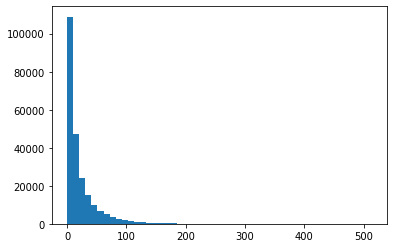

In [27]:
basket_prices = transactions.groupby("BASKET_ID").PAID_PRICE.sum()
plt.hist(basket_prices, bins=50)
plt.plot()

In [28]:
print(f"The average basket price is {round(basket_prices.mean(), 2)} $")
print(f"The median basket price is {round(basket_prices.median(), 2)} $")

The average basket price is 21.72 $
The median basket price is 11.37 $


It seems that the basket price follows a heavy tailed distribution. We can plot it on a semi-log scale :

[]

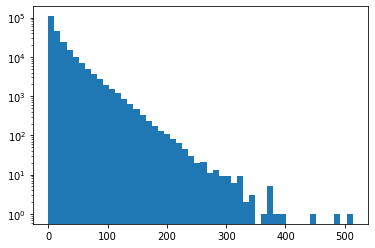

In [29]:
plt.hist(basket_prices, bins=50)
plt.yscale("log")
plt.plot()

We see that there are some baskets that cost 0 dollars. Let's have a look at one of those baskets :

In [30]:
transactions[transactions.PAID_PRICE == 0].head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,PAID_PRICE
15,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,0.0
62,1060,26985040735,1,924804,1,1.19,315,-1.20,1251,1,0.0,0.0,0.0
70,1060,26985040735,1,992246,1,1.25,315,-1.34,1251,1,0.0,0.0,0.0
147,718,26985360571,1,913785,1,0.99,324,-1.00,1115,1,0.0,0.0,0.0
165,718,26985360571,1,981760,1,0.60,324,-0.79,1115,1,0.0,0.0,0.0


This was surprising at first sight but we can see that for some transactions, the discount is bigger than the sales value. This explains why some transactions do not cost anything to the buyer.

#### What is the average size of a basket ?

In [31]:
transactions.groupby("BASKET_ID").count()["PRODUCT_ID"].mean()

9.790533444548648

### In which food-related department are there the most retail discounts ?

We are intersted in this question as it may influence the consumption behaviour of the customers.

In [32]:
# Select transactions with discount
transactions_with_discount = transactions[transactions.RETAIL_DISC < 0.0]
# Merge with dataframe containing the products to get the department
transac_prod_with_disc = pd.merge(transactions_with_discount, food_products, on="PRODUCT_ID", how="inner")[["PRODUCT_ID", "RETAIL_DISC", "DEPARTMENT"]]

In [33]:
# Get the number of products/dep as well as the number of discount/dep
num_prodcts_by_dep = food_products.groupby("DEPARTMENT").count()["PRODUCT_ID"]
num_discount_by_dep = transac_prod_with_disc.groupby("DEPARTMENT").count()["RETAIL_DISC"]

# We normalize the number of discount because some departments have many more products than others
normalized_discount_by_dep = num_discount_by_dep / num_prodcts_by_dep
normalized_discount_by_dep.sort_values(ascending=False)

DEPARTMENT
MEAT-PCKGD        28.994232
GROCERY           24.327055
SALAD BAR         22.958333
PRODUCE           19.802437
MEAT              18.696148
SEAFOOD-PCKGD     12.925400
DELI              11.215378
PASTRY             6.019544
CHEF SHOPPE        5.714286
DAIRY DELI         5.666667
NUTRITION          4.927591
SEAFOOD            4.604336
FROZEN GROCERY     1.521739
RESTAURANT         0.137255
DELI/SNACK BAR          NaN
GRO BAKERY              NaN
PORK                    NaN
SPIRITS                 NaN
dtype: float64

### What is the average paid price by Department ?

In [34]:
transac_prod = pd.merge(transactions, food_products, on="PRODUCT_ID", how="inner")[["PRODUCT_ID", "PAID_PRICE", "DEPARTMENT"]]

In [35]:
average_price_by_dep = transac_prod.groupby("DEPARTMENT")["PAID_PRICE"].mean().sort_values(ascending=False)
average_price_by_dep

DEPARTMENT
SPIRITS           10.226937
PORK               7.850000
SEAFOOD            5.678356
MEAT               4.395866
RESTAURANT         4.264215
SEAFOOD-PCKGD      3.811378
DELI               3.803988
DELI/SNACK BAR     3.280000
SALAD BAR          3.160173
CHEF SHOPPE        2.869413
PASTRY             2.780976
MEAT-PCKGD         2.697060
NUTRITION          2.659637
FROZEN GROCERY     2.496056
GROCERY            1.997943
PRODUCE            1.912026
DAIRY DELI         1.342642
GRO BAKERY         1.090000
Name: PAID_PRICE, dtype: float64

## Which product pays the most ?

In [41]:
transac_prod = pd.merge(transactions, food_products, on="PRODUCT_ID", how="inner")
transac_prod.groupby(['PRODUCT_ID'], as_index=False)\
            .agg({'COMMODITY_DESC': 'first', 'SUB_COMMODITY_DESC': 'first', 'PAID_PRICE': 'sum'})\
            .sort_values(by="PAID_PRICE", ascending=False)\
            .head(10)

,PRODUCT_ID,COMMODITY_DESC,SUB_COMMODITY_DESC,PAID_PRICE
19927,1029743,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,38451.09
23632,1082185,TROPICAL FRUIT,BANANAS,27168.62
25330,1106523,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,26147.93
6837,844179,BEEF,PRIMAL,14574.54
20969,1044078,BEEF,LEAN,12970.96
26680,1126899,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,12652.43
18246,1005186,SALAD BAR,SALAD BAR FRESH FRUIT,12554.10
17520,995242,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,12020.87
22806,1070820,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,11645.41
26741,1127831,BERRIES,STRAWBERRIES,11353.37


## Looking at the spending per Department

In [107]:
spent_by_dep = transac_prod.groupby('DEPARTMENT')\
                           .agg({'PAID_PRICE': 'sum'})\
                           .reset_index()\
                           .sort_values(by="PAID_PRICE", ascending=False)

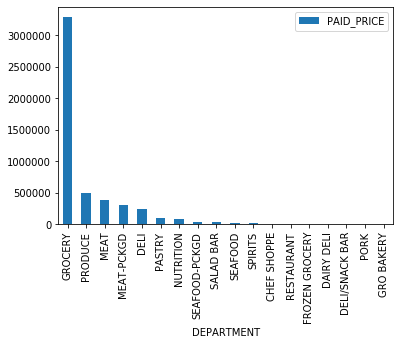

In [108]:
spent_by_dep.plot.bar(x="DEPARTMENT", y="PAID_PRICE")

## Households transactions

In [36]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,PAID_PRICE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,0.79
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.69
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.11


In [37]:
weeks_activity_by_household = transactions.groupby("household_key").agg({"WEEK_NO": set, "PAID_PRICE": sum})

In [63]:
weeks_activity_by_household["Number_of_active_weeks"] = weeks_activity_by_household["WEEK_NO"].apply(lambda x: len(x))
weeks_activity_by_household["avg_spending_per_week"] = weeks_activity_by_household["PAID_PRICE"] / weeks_activity_by_household["Number_of_active_weeks"]
weeks_activity_by_household = weeks_activity_by_household.drop(columns="WEEK_NO")

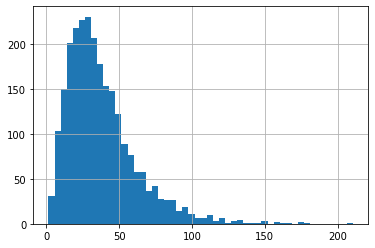

In [39]:
weeks_activity_by_household = weeks_activity_by_household.sort_values(by="Number_of_active_weeks", ascending=False)
weeks_activity_by_household.avg_spending_per_week.hist(bins=50)

In [40]:
np.median(weeks_activity_by_household.avg_spending_per_week)
np.mean(weeks_activity_by_household.avg_spending_per_week)

37.829245754537446

## Focus on meat consumption

In [42]:
meat_transactions = pd.merge(meat_products, transactions, on="PRODUCT_ID", how="inner")
# cont_meat_transactions = pd.merge(cont_meat, transactions, on="PRODUCT_ID", how="inner")
# meat_transactions = pd.concat([meat_transactions, cont_meat_transactions])

In [43]:
print(f"Number of transactions for meat : {len(meat_transactions)}")

Number of transactions for meat : 262556


In [44]:
total_spent_for_meat = meat_transactions.PAID_PRICE.sum()
total_spent = transactions.PAID_PRICE.sum()

print("Percentage of money spent for meat: %.2f percent" % ((total_spent_for_meat / total_spent) * 100) )

Percentage of money spent for meat: 18.25 percent


In [64]:
spent_for_meat_by_household = meat_transactions.groupby("household_key").agg({"PAID_PRICE": sum}).reset_index()
spent_by_household = transactions.groupby("household_key").PAID_PRICE.sum()

In [65]:
spent_for_meat_by_household.head()

,household_key,PAID_PRICE
0,1,401.26
1,2,222.66
2,3,397.25
3,4,160.56
4,5,116.22


In [66]:
spent_by_household = pd.merge(spent_for_meat_by_household, weeks_activity_by_household, on="household_key")

In [70]:
spent_by_household = spent_by_household.rename(columns={"PAID_PRICE_x": "paid_meat", "PAID_PRICE_y": "paid_food"})
spent_by_household["avg_spending_meat_per_week"] = spent_by_household.paid_meat / spent_by_household.Number_of_active_weeks
spent_by_household["ratio_spent_for_meat"] = spent_by_household.avg_spending_meat_per_week / spent_by_household.avg_spending_per_week

In [74]:
spent_by_household.head()

,household_key,paid_meat,paid_food,Number_of_active_weeks,avg_spending_per_week,avg_spending_meat_per_week,ratio_spent_for_meat
0,1,401.26,3111.59,67,46.441642,5.988955,0.128957
1,2,222.66,1280.96,32,40.030000,6.958125,0.173823
2,3,397.25,1825.65,36,50.712500,11.034722,0.217594
3,4,160.56,777.79,26,29.915000,6.175385,0.206431
4,5,116.22,467.18,24,19.465833,4.842500,0.248769


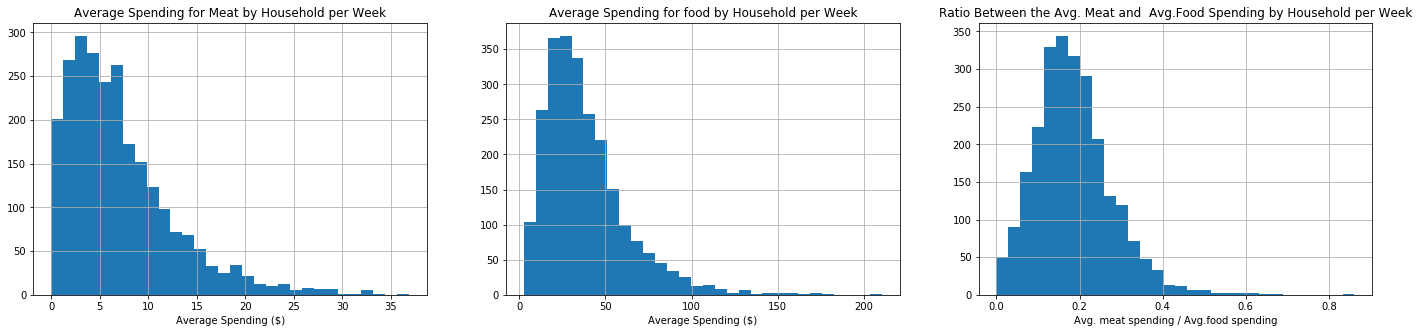

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
spent_by_household.avg_spending_meat_per_week.hist(bins=30, ax=axes[0])
spent_by_household.avg_spending_per_week.hist(bins=30, ax=axes[1])
spent_by_household.ratio_spent_for_meat.hist(bins=30, ax=axes[2])

axes[0].set_title("Average Spending for Meat by Household per Week")
axes[1].set_title("Average Spending for food by Household per Week")
axes[2].set_title("Ratio Between the Avg. Meat and  Avg.Food Spending by Household per Week")
for ax in axes[0:2]: 
    ax.set_xlabel("Average Spending ($)")
axes[2].set_xlabel("Avg. meat spending / Avg.food spending")
plt.show()

In [103]:
print (f"Max spent for meat by household by week : {round(max(spent_by_household.avg_spending_meat_per_week), 2)} $")
print (f"Mean spent for meat by household by week : {round(np.mean(spent_by_household.avg_spending_meat_per_week), 2)} $")
print (f"Median spent for meat by household by week : {round(np.median(spent_by_household.avg_spending_meat_per_week), 2)} $")

Max spent for meat by household by week : 36.87 $
Mean spent for meat by household by week : 7.13 $
Median spent for meat by household by week : 5.92 $


In [106]:
print (f"Mean Ratio Between the Avg. Meat and  Avg.Food Spending by Household per Week: {round(np.mean(spent_by_household.ratio_spent_for_meat), 2)}")

Mean Ratio Between the Avg. Meat and  Avg.Food Spending by Household per Week: 0.19
